In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "2,3"

import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

from env import *
from DataLoader import DataLoader
from AttGan import AttGan

Initial Image:


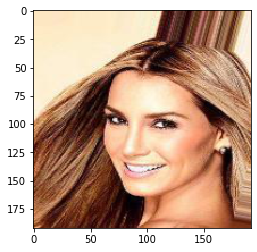

Selected attributes:
['Bald' 'Eyeglasses' 'Male']
Number of images: 202599
Number of attributes: 3
Number of batches: 1583
Building Attgan...
Instructions for updating:
Colocations handled automatically by placer.
Building generator 0...
Generator 0 was built.
Building discriminator 0...
Discriminator 0 was built.
Instructions for updating:
Use tf.cast instead.
Building generator 1...
Generator 1 was built.
Building discriminator 1...
Discriminator 1 was built.
Attgan was built.
Epochs 1/100
Train generator loss: 23.19116639
Train discriminator loss: 4.49791054


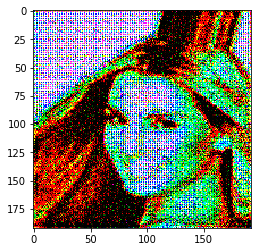

Epochs 2/100
Train generator loss: 6.53317625
Train discriminator loss: 4.30760004


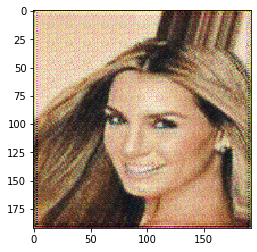

In [ ]:
# construct test image
test_image = cv2.imread(TEST_IMAGE)
test_image = cv2.resize(test_image, dsize=(HEIGHT, WIDTH))
test_image = (np.float32(test_image) - 128) / 128
test_image_rgb = np.ubyte((test_image + 1) * 128)
test_image_rgb = cv2.cvtColor(test_image_rgb, cv2.COLOR_BGR2RGB)

print("Initial Image:")
plt.imshow(test_image_rgb)
plt.show()

# construct data loader
dloader = DataLoader(BATCH_SIZE)
dloader.build()

# construct model
model = AttGan(eta=ETA, num_att=dloader.num_att)
model.build()


test_att = np.array([-1, 1, 1])

# tensorboard settings
# tf.summary.FileWriter("./logdir/", graph=model.graph)

# train
for e in range(EPOCHS):
    
    # loss for generator and discriminator
    train_loss_g = 0.0
    train_loss_d = 0.0
    
    # batch train step
    for X_src, X_att_a, X_att_b in dloader.next_batch():
        loss_g, loss_d = model.step(X_src, X_att_a, X_att_b)
        train_loss_g += loss_g
        train_loss_d += loss_d
        
    # compute loss
    train_loss_g /= len(dloader)
    train_loss_d /= len(dloader)
    
    print(f"Epochs {e+1}/{EPOCHS}")
    print(f"Train generator loss: {train_loss_g:.8f}")
    print(f"Train discriminator loss: {train_loss_d:.8f}")
    
    # test attgan
    test_result = model.convert(test_image.reshape(-1, *test_image.shape), test_att.reshape(-1, *test_att.shape))
    test_result = test_result.squeeze()
    
    test_result = np.ubyte((test_result + 1) * 128)
    test_result = cv2.cvtColor(test_result, cv2.COLOR_BGR2RGB)
    plt.imshow(test_result)
    plt.show()
    
model.save("./ckpts/attgan")

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("data_sample_/img_align_celeba/000052.jpg")
img = cv2.resize(img, dsize=(96, 96)).astype(np.float32)

img = (img - 128) / 128

img_src = cv2.cvtColor((img + 1)/2, cv2.COLOR_BGR2RGB)
plt.imshow(img_src)

In [ ]:
img_converted = model.convert(img.reshape(1, *img.shape), np.ones((1, 1)))

In [ ]:
img_converted = cv2.cvtColor(img_converted.squeeze(), cv2.COLOR_BGR2RGB)
plt.imshow((img_converted*127 + 128)/255)